# readme 

test depth-integrated velocity divergence 

In [1]:
import numpy as np
import xarray as xr
import pop_tools
import xgcm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from dask.distributed import Client

incorporate dask

In [2]:
client = Client("tcp://10.72.16.3:41841")
client

Client Scheduler: tcp://10.72.16.3:41841 Dashboard: http://10.72.16.3:8787/status,Cluster Workers: 4 Cores: 8 Memory: 32.00 GB


In [3]:
indir = '/ihesp/archive/g.e20.G.TL319_t13.control.001_contd/ocn/hist/'
infile_5d = indir + 'g.e20.G.TL319_t13.control.001_contd.pop.h.0167-11-01.nc' # 5-day av

nlat_NA_slice = slice(1200, 2400) # North Atlantic (NA)
nlon_NA_slice = slice(0, 1200)

ds_5d = xr.open_dataset(infile_5d, chunks={'nlat':600,'nlon':300})
ds_NA_5d = ds_5d.isel(nlon=nlon_NA_slice, nlat=nlat_NA_slice)
ds_NA_5d

<xarray.Dataset>
Dimensions:                 (d2: 2, nlat: 1200, nlon: 1200, time: 1, z_t: 62, z_t_150m: 15, z_w: 62, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                    (time) object 0167-11-02 00:00:00
  * z_t                     (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                     (z_w) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 599999.06
    ULONG                   (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ULAT                    (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLONG                   (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLAT                    (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound              (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                      (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                     (z_w) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMT                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    KMU                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    REGION_MASK             (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    UAREA                   (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TAREA                   (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HU                      (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HT                      (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DXU                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DYU                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DXT                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DYT                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HTN                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HTE                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HUS                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HUW                     (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ANGLE                   (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ANGLET                  (nlat, nlon) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    days_in_norm_year       timedelta64[ns] ...
    grav                    float64 ...
    omega                   float64 ...
    radius                  float64 ...
    cp_sw                   float64 ...
    sound                   float64 ...
    vonkar                  float64 ...
    cp_air                  float64 ...
    rho_air                 float64 ...
    rho_sw                  float64 ...
    rho_fw                  float64 ...
    stefan_boltzmann        float64 ...
    latent_heat_vapor       float64 ...
    latent_heat_fusion      float64 ...
    latent_heat_fusion_mks  float64 ...
    ocn_ref_salinity        float64 ...
    sea_ice_salinity        float64 ...
    T0_Kelvin               float64 ...
    salt_to_ppt             float64 ...
    ppt_to_salt             float64 ...
    mass_to_Sv              float64 ...
    heat_to_PW              float64 ...
    salt_to_Svppt           float64 ...
    salt_to_mmday           float64 ...
    momentum_f

convert to xgcm compatible

In [4]:
grid, ds_NA_5dx = pop_tools.to_xgcm_grid_dataset(ds_NA_5d, periodic=False)
ds_NA_5dx

<xarray.Dataset>
Dimensions:                 (d2: 2, nlat_t: 1200, nlat_u: 1200, nlon_t: 1200, nlon_u: 1200, time: 1, z_t: 62, z_t_150m: 15, z_w_bot: 62, z_w_top: 62)
Coordinates:
  * time                    (time) object 0167-11-02 00:00:00
  * z_t                     (z_t) float32 500.0 1500.0 ... 562499.06 587499.06
  * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 549999.06 574999.06
  * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 599999.06
    ULONG                   (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ULAT                    (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLONG                   (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLAT                    (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
  * nlon_u                  (nlon_u) int64 1 2 3 4 5 ... 1197 1198 1199 1200
  * nlat_u                  (nlat_u) int64 1 2 3 4 5 ... 1197 1198 1199 1200
  * nlon_t                  (nlon_t) float64 0.5 1.5 2.5 ... 1.198e+03 1.2e+03
  * nlat_t                  (nlat_t) float64 0.5 1.5 2.5 ... 1.198e+03 1.2e+03
Dimensions without coordinates: d2
Data variables:
    time_bound              (time, d2) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    dz                      (z_t) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    dzw                     (z_w_top) float32 dask.array<chunksize=(62,), meta=np.ndarray>
    KMT                     (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    KMU                     (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    REGION_MASK             (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    UAREA                   (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TAREA                   (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HU                      (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HT                      (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DXU                     (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DYU                     (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DXT                     (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    DYT                     (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HTN                     (nlat_u, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HTE                     (nlat_t, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HUS                     (nlat_t, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    HUW                     (nlat_u, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ANGLE                   (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ANGLET                  (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    days_in_norm_year       timedelta64[ns] ...
    grav                    float64 ...
    omega                   float64 ...
    radius                  float64 ...
    cp_sw                   float64 ...
    sound                   float64 ...
    vonkar                  float64 ...
    cp_air                  float64 ...
    rho_air                 float64 ...
    rho_sw                  float64 ...
    rho_fw                  float64 ...
    stefan_boltzmann        float64 ...
    latent_heat_vapor       float64 ...
    latent_heat_fusion      float64 ...
    latent_heat_fusion_mks  float64 ...
    ocn_ref_salinity        float64 ...


In [5]:
import numpy as np
import xarray as xr

def pbc_dzt(dz,kmt,ht,z_w_bot,mval=0):
    '''notes: shared by Fred on 2020Mar11 (DL)'''
    nz = np.shape(dz)[0]
    ny,nx = np.shape(kmt)
    dzt = np.zeros((nz,ny,nx)) + dz.values[:,None,None]
    for iz in range(0,nz):
        bottom = (kmt.values==(iz+1))
        belowbottom = (kmt.values<(iz+1))
        count1 = np.count_nonzero(bottom)
        count2 = np.count_nonzero(belowbottom)
        if (count1 > 0):
            tmp2 = dzt[iz,:,:]
            tmp2[bottom] = ht.values[bottom] - z_w_bot.values[iz-1]
            dzt[iz,:,:]=tmp2
        if (count2 > 0):
            tmp2 = dzt[iz,:,:]
            tmp2[belowbottom] = mval
            dzt[iz,:,:]=tmp2
    dzt = xr.DataArray(dzt,dims=['z_t','nlat_u','nlon_u'])
    dzt.encoding['_FillValue']=mval
    return dzt

In [6]:
dzt1 = pbc_dzt(ds_NA_5dx.dz, ds_NA_5dx.KMT, ds_NA_5dx.HT, ds_NA_5dx.z_w_bot, mval=0) 
# dzt1 is t grid thickness including the partial bottom cell thickness adjustment
dzt1

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.in

<xarray.DataArray (z_t: 62, nlat_u: 1200, nlon_u: 1200)>
array([[[ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
             0.      ,     0.      ],
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
             0.      ,     0.      ],
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
             0.      ,     0.      ],
        ...,
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
          1000.      ,  1000.      ],
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
          1000.      ,  1000.      ],
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
          1000.      ,  1000.      ]],

       [[ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
             0.      ,     0.      ],
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
             0.      ,     0.      ],
        [ 1000.      ,  1000.      ,  1000.      , ...,  1000.      ,
             0.      ,     0.      ],
...
        [25000.      , 25000.      , 25000.      , ...,     0.      ,
             0.      ,     0.      ],
        [25000.      , 25000.      , 25000.      , ...,     0.      ,
             0.      ,     0.      ],
        [25000.      , 25000.      , 25000.      , ...,     0.      ,
             0.      ,     0.      ]],

       [[    0.      ,     0.      ,     0.      , ...,     0.      ,
             0.      ,     0.      ],
        [    0.      ,     0.      ,     0.      , ...,     0.      ,
             0.      ,     0.      ],
        [    0.      ,     0.      ,     0.      , ...,     0.      ,
             0.      ,     0.      ],
        ...,
        [25000.      , 25000.      , 25000.      , ...,     0.      ,
             0.      ,     0.      ],
        [25000.      , 25000.      , 25000.      , ...,     0.      ,
             0.      ,     0.      ],
        [25000.      , 25000.      , 25000.      , ...,     0.      ,
             0.      ,     0.      ]]])
Dimensions without coordinates: z_t, nlat_u, nlon_u

In [7]:
ssh_NA_u = grid.interp(ds_NA_5dx.SSH.mean('time'), ["X","Y"], boundary="extend").rename('ssh_U')
ssh_NA_u

<xarray.DataArray 'ssh_U' (nlat_u: 1200, nlon_u: 1200)>
dask.array<mul, shape=(1200, 1200), dtype=float32, chunksize=(599, 299), chunktype=numpy.ndarray>
Coordinates:
  * nlat_u   (nlat_u) int64 1 2 3 4 5 6 7 ... 1194 1195 1196 1197 1198 1199 1200
  * nlon_u   (nlon_u) int64 1 2 3 4 5 6 7 ... 1194 1195 1196 1197 1198 1199 1200

In [8]:
dzt2 = dzt1 # dzt2 is the dzt1 including SSH 
dzt2[0,:,:] =  dzt1[0,:,:] + ssh_NA_u
dzt2[0,:,:]

<xarray.DataArray (nlat_u: 1200, nlon_u: 1200)>
array([[1029.97544289, 1029.65137863, 1029.3071537 , ...,           nan,
                  nan,           nan],
       [1030.22278786, 1029.91847801, 1029.59087753, ...,           nan,
                  nan,           nan],
       [1030.48582458, 1030.20456505, 1029.8994751 , ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,  920.11947632,
         920.3408432 ,  920.43087769],
       [          nan,           nan,           nan, ...,  920.86291504,
         921.16423798,  921.29699707],
       [          nan,           nan,           nan, ...,  921.20353699,
         921.54559326,  921.75222015]])
Dimensions without coordinates: nlat_u, nlon_u

In [9]:
u1_NA_int1 = (ds_NA_5dx.UVEL*dzt1).sum('z_t')
u2_NA_int1 = (ds_NA_5dx.VVEL*dzt1).sum('z_t')
u1_NA_int1

<xarray.DataArray (time: 1, nlat_u: 1200, nlon_u: 1200)>
dask.array<sum-aggregate, shape=(1, 1200, 1200), dtype=float64, chunksize=(1, 600, 300), chunktype=numpy.ndarray>
Coordinates:
  * nlat_u   (nlat_u) int64 1 2 3 4 5 6 7 ... 1194 1195 1196 1197 1198 1199 1200
  * nlon_u   (nlon_u) int64 1 2 3 4 5 6 7 ... 1194 1195 1196 1197 1198 1199 1200
  * time     (time) object 0167-11-02 00:00:00
    ULONG    (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ULAT     (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>

In [10]:
u1_NA_int2 = (ds_NA_5dx.UVEL*dzt2).sum('z_t')
u2_NA_int2 = (ds_NA_5dx.VVEL*dzt2).sum('z_t')
u1_NA_int2

<xarray.DataArray (time: 1, nlat_u: 1200, nlon_u: 1200)>
dask.array<sum-aggregate, shape=(1, 1200, 1200), dtype=float64, chunksize=(1, 600, 300), chunktype=numpy.ndarray>
Coordinates:
  * nlat_u   (nlat_u) int64 1 2 3 4 5 6 7 ... 1194 1195 1196 1197 1198 1199 1200
  * nlon_u   (nlon_u) int64 1 2 3 4 5 6 7 ... 1194 1195 1196 1197 1198 1199 1200
  * time     (time) object 0167-11-02 00:00:00
    ULONG    (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    ULAT     (nlat_u, nlon_u) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>

compare depth-integrated velocity from (1) POP model outputs, (2) depth-integrated with dzt1, and (3) depth-integrated with dzt2

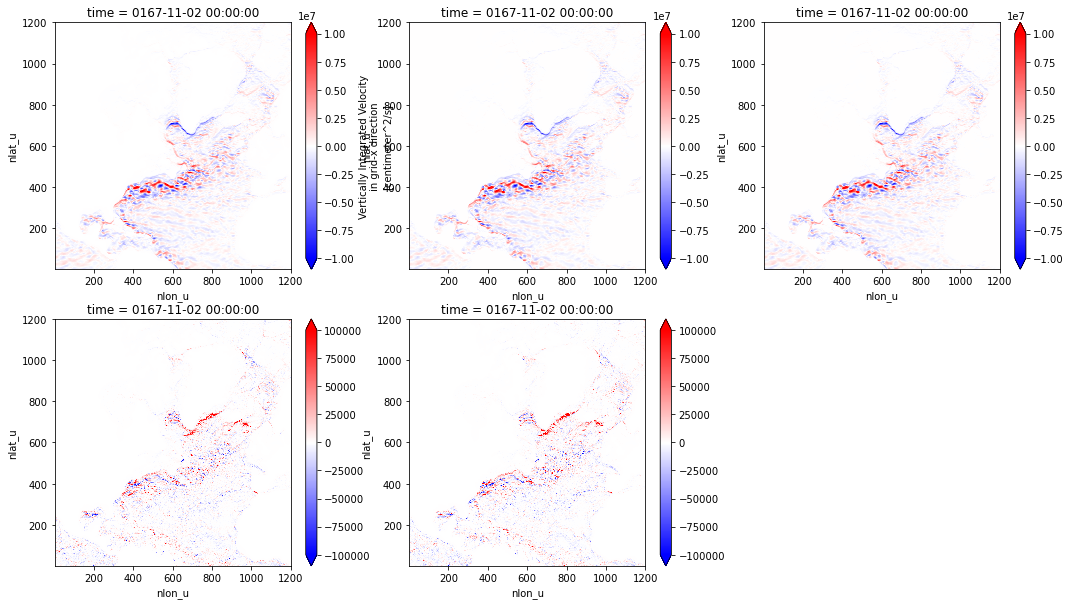

In [11]:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(231)
ds_NA_5dx.SU.isel(time=0).plot(vmin=-1e7,vmax=1e7,cmap='bwr')
ax2 = fig.add_subplot(232)
u1_NA_int1.isel(time=0).plot(vmin=-1e7,vmax=1e7,cmap='bwr')
ax3 = fig.add_subplot(233)
u1_NA_int2.isel(time=0).plot(vmin=-1e7,vmax=1e7,cmap='bwr')
ax4 = fig.add_subplot(234)
(ds_NA_5dx.SU.isel(time=0)-u1_NA_int1.isel(time=0)).plot(vmin=-1e5,vmax=1e5,cmap='bwr')
ax5 = fig.add_subplot(235)
(ds_NA_5dx.SU.isel(time=0)-u1_NA_int2.isel(time=0)).plot(vmin=-1e5,vmax=1e5,cmap='bwr')

In [12]:
# using xgcm
def div_4pt_xgcm(U, V):  # Basic stencil operator for B-grid divergence
    """
    POP stencil operator for divergence
    using xgcm
    """
    U_at_lat_t = grid.interp(U, axis="Y", boundary="extend")  # array - array.roll becomes interp
    # -> this incoorporates the * 0.5
    dUdx = grid.diff(U_at_lat_t, axis="X", boundary="extend")  # - becomes diff
    V_at_lon_t = grid.interp(V, axis="X", boundary="extend")
    dVdy = grid.diff(V_at_lon_t, axis="Y", boundary="extend")
    div_4pt = dUdx + dVdy
    return div_4pt


def divh_xgcm_DL(U, V, ds_grid):  # Divergence of horizontal velocity. Result on T-grid
    """
    calulate divergence with xgcm
    2021Mar08 edited by DL: remove ds_grid.DZU and ds_grid.DZT, Qiuying said DZT and DZU are the same
    """
    changed_U = U * ds_grid.DYU
    changed_V = V * ds_grid.DXU
    divh = div_4pt_xgcm(changed_U, changed_V) / ds_grid.TAREA
    return divh

In [13]:
u1_NA = ds_NA_5dx.SU.where(ds_NA_5dx.KMU>0, np.nan)
u2_NA = ds_NA_5dx.SV.where(ds_NA_5dx.KMU>0, np.nan)
vel_div_NA = divh_xgcm_DL(u1_NA, u2_NA, ds_NA_5dx) # mass (m) flux (f)
vel_div_NA

<xarray.DataArray (time: 1, nlat_t: 1200, nlon_t: 1200)>
dask.array<truediv, shape=(1, 1200, 1200), dtype=float64, chunksize=(1, 599, 299), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0167-11-02 00:00:00
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 1.198e+03 1.198e+03 1.2e+03
  * nlon_t   (nlon_t) float64 0.5 1.5 2.5 3.5 ... 1.198e+03 1.198e+03 1.2e+03
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>

In [14]:
u1_NA_int1 = u1_NA_int1.where(ds_NA_5dx.KMU>0, np.nan)
u2_NA_int1 = u2_NA_int1.where(ds_NA_5dx.KMU>0, np.nan)
vel_div1_NA = divh_xgcm_DL(u1_NA_int1, u2_NA_int1, ds_NA_5dx) # mass (m) flux (f)
vel_div1_NA

<xarray.DataArray (time: 1, nlat_t: 1200, nlon_t: 1200)>
dask.array<truediv, shape=(1, 1200, 1200), dtype=float64, chunksize=(1, 599, 299), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0167-11-02 00:00:00
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 1.198e+03 1.198e+03 1.2e+03
  * nlon_t   (nlon_t) float64 0.5 1.5 2.5 3.5 ... 1.198e+03 1.198e+03 1.2e+03
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>

In [15]:
u1_NA_int2 = u1_NA_int2.where(ds_NA_5dx.KMU>0, np.nan)
u2_NA_int2 = u2_NA_int2.where(ds_NA_5dx.KMU>0, np.nan)
vel_div2_NA = divh_xgcm_DL(u1_NA_int2, u2_NA_int2, ds_NA_5dx) # mass (m) flux (f)
vel_div2_NA

<xarray.DataArray (time: 1, nlat_t: 1200, nlon_t: 1200)>
dask.array<truediv, shape=(1, 1200, 1200), dtype=float64, chunksize=(1, 599, 299), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0167-11-02 00:00:00
  * nlat_t   (nlat_t) float64 0.5 1.5 2.5 3.5 ... 1.198e+03 1.198e+03 1.2e+03
  * nlon_t   (nlon_t) float64 0.5 1.5 2.5 3.5 ... 1.198e+03 1.198e+03 1.2e+03
    TLONG    (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>
    TLAT     (nlat_t, nlon_t) float64 dask.array<chunksize=(600, 300), meta=np.ndarray>

compare depth-integrated velocity divergence from (1) POP model outputs, (2) depth-integrated with dzt1, and (3) depth-integrated with dzt2

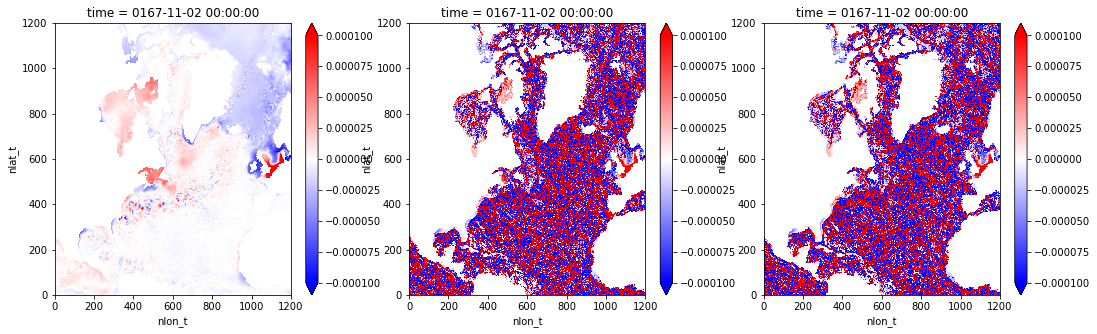

In [16]:
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(131)
vel_div_NA.isel(time=0).plot(vmin=-1e-4, vmax=1e-4, cmap='bwr')
ax2 = fig.add_subplot(132)
vel_div1_NA.isel(time=0).plot(vmin=-1e-4, vmax=1e-4, cmap='bwr')
ax3 = fig.add_subplot(133)
vel_div2_NA.isel(time=0).plot(vmin=-1e-4, vmax=1e-4, cmap='bwr')

In [17]:
5*86400*1e-4 

43.2

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


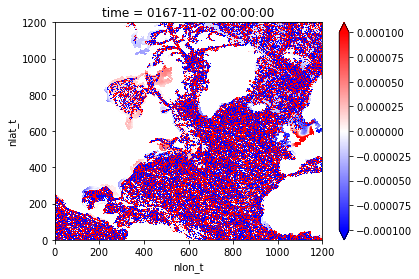

In [21]:
vel_div_NA.isel(time=0).plot(vmin=-1e-4, vmax=1e-4, cmap='bwr')

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


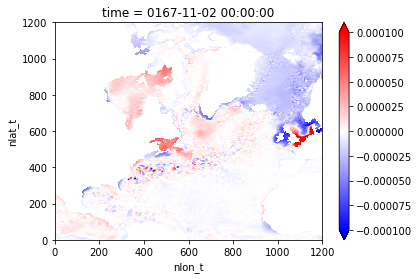

In [10]:
vel_div_NA.isel(time=0).plot(vmin=-1e-4, vmax=1e-4, cmap='bwr')

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


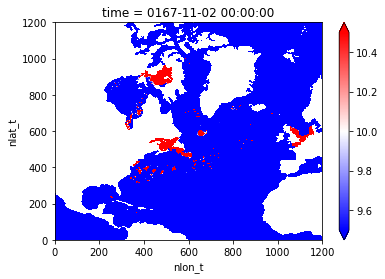

In [19]:
(vel_div_NA.isel(time=0)*5*86400).plot(vmin=10, vmax=10, cmap='bwr')

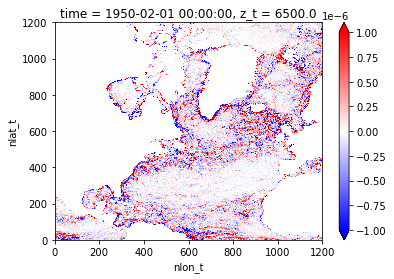

In [9]:
vel_div_NA.isel(time=0,z_t=6).plot(vmin=-1e-6, vmax=1e-6, cmap='bwr')

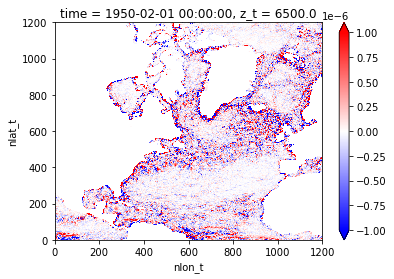

In [12]:
vel_div_NA.isel(time=0,z_t=6).plot(vmin=-1e-6, vmax=1e-6, cmap='bwr')

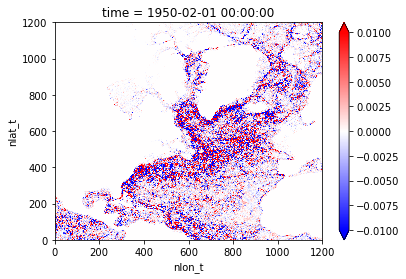

In [25]:
div_int = (vel_div_NA*dzt1).sum('z_t')
div_int.plot(vmin=-1e-2, vmax=1e-2, cmap='bwr')

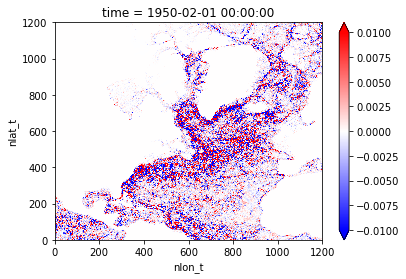

In [10]:
div_int = (vel_div_NA*dzt1).sum('z_t')
div_int.plot(vmin=-1e-2, vmax=1e-2, cmap='bwr')

In [19]:
np.log10(10)

1.0

In [24]:
10/86400/30

3.858024691358025e-06

/ihesp/shared/conda/envs/jupyterlab_env/lib/python3.6/site-packages/xarray/core/computation.py:700: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


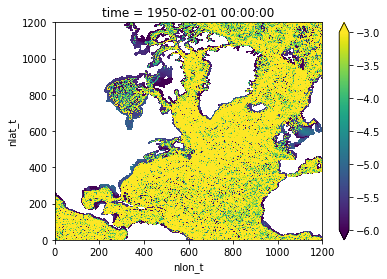

In [23]:
a = np.log10(abs(div_int).isel(time=0))
a.plot(vmin=-6,vmax=-3)

In [11]:
1e-4*86400*30

259.20000000000005

[-2.23659880e-07 -2.47010878e-07 -3.07688844e-07 -3.60956606e-07
 -3.79777550e-07 -4.10185903e-07 -4.81710661e-07 -5.62980039e-07
 -6.49242062e-07 -6.73410441e-07 -6.13018210e-07 -5.90047232e-07
 -5.73071150e-07 -5.13311430e-07 -4.16644628e-07 -3.90754591e-07
 -3.08409415e-07 -3.34007095e-07 -3.10984563e-07 -2.55759305e-07
 -2.07114317e-07 -2.10132669e-07 -2.91782106e-07 -2.92359890e-07
 -2.85904623e-07 -2.88312201e-07 -2.65549680e-07 -2.43801348e-07
 -2.18574851e-07 -2.01260323e-07 -1.97348002e-07 -2.18765283e-07
 -2.37037908e-07 -1.84481316e-07 -8.93038020e-08 -1.75357252e-08
 -1.56544102e-08  1.07775491e-08  1.13340691e-08  2.47688016e-08
  3.52941220e-08  4.17096530e-08  4.78818215e-08  5.19009063e-08
  5.39945187e-08  5.52900512e-08  5.50568416e-08  5.44330676e-08
  5.33008628e-08  4.74164574e-08  3.86727542e-08  3.05969608e-08
  2.45131268e-08  2.11549843e-08  1.98635012e-08  1.72956646e-08
 -2.82663942e-09 -4.56021101e-08 -9.86199795e-08 -1.16750796e-07
             nan         

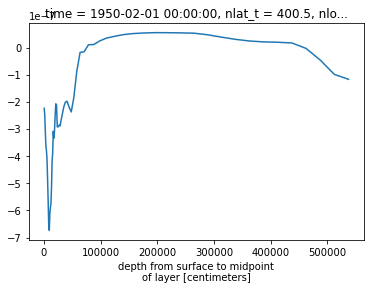

In [12]:
vel_div_NA.isel(time=0, nlon_t=600, nlat_t=400).plot()
print(vel_div_NA.isel(time=0, nlon_t=600, nlat_t=400).values)
print(div_int.isel(time=0, nlon_t=600, nlat_t=400).values)

In [34]:
print(vel_div_NA.isel(time=0, nlon_t=600, nlat_t=400).mean('z_t'))
vel_div_NA.isel(time=0, nlon_t=600, nlat_t=400).fillna(0)

<xarray.DataArray ()>
array(-1.93934879e-07)
Coordinates:
    time     object 1950-02-01 00:00:00
    nlat_t   float64 400.5
    nlon_t   float64 600.5
    TLONG    float64 309.7
    TLAT     float64 39.34


<xarray.DataArray (z_t: 62)>
array([-2.23659880e-07, -2.47010878e-07, -3.07688844e-07, -3.60956606e-07,
       -3.79777550e-07, -4.10185903e-07, -4.81710661e-07, -5.62980039e-07,
       -6.49242062e-07, -6.73410441e-07, -6.13018210e-07, -5.90047232e-07,
       -5.73071150e-07, -5.13311430e-07, -4.16644628e-07, -3.90754591e-07,
       -3.08409415e-07, -3.34007095e-07, -3.10984563e-07, -2.55759305e-07,
       -2.07114317e-07, -2.10132669e-07, -2.91782106e-07, -2.92359890e-07,
       -2.85904623e-07, -2.88312201e-07, -2.65549680e-07, -2.43801348e-07,
       -2.18574851e-07, -2.01260323e-07, -1.97348002e-07, -2.18765283e-07,
       -2.37037908e-07, -1.84481316e-07, -8.93038020e-08, -1.75357252e-08,
       -1.56544102e-08,  1.07775491e-08,  1.13340691e-08,  2.47688016e-08,
        3.52941220e-08,  4.17096530e-08,  4.78818215e-08,  5.19009063e-08,
        5.39945187e-08,  5.52900512e-08,  5.50568416e-08,  5.44330676e-08,
        5.33008628e-08,  4.74164574e-08,  3.86727542e-08,  3.05969608e-08,
        2.45131268e-08,  2.11549843e-08,  1.98635012e-08,  1.72956646e-08,
       -2.82663942e-09, -4.56021101e-08, -9.86199795e-08, -1.16750796e-07,
        0.00000000e+00,  0.00000000e+00])
Coordinates:
    time     object 1950-02-01 00:00:00
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 537500.0 562499.06 587499.06
    nlat_t   float64 400.5
    nlon_t   float64 600.5
    TLONG    float64 309.7
    TLAT     float64 39.34

In [29]:
dzt1.isel(nlon_t=600, nlat_t=400).cumsum('z_t')

<xarray.DataArray (z_t: 62)>
array([  1000.        ,   2000.        ,   3000.        ,   4000.        ,
         5000.        ,   6000.        ,   7000.        ,   8000.        ,
         9000.        ,  10000.        ,  11000.        ,  12000.        ,
        13000.        ,  14000.        ,  15000.        ,  16000.        ,
        17019.68078613,  18076.12915039,  19182.12426758,  20349.93127441,
        21592.34460449,  22923.31237793,  24358.45336914,  25915.57922363,
        27615.25878906,  29481.47119141,  31542.37353516,  33831.22558594,
        36387.47265625,  39258.04760742,  42498.88476562,  46176.65722656,
        50370.68798828,  55174.91162109,  60699.66601562,  67072.85791016,
        74439.80273438,  82960.6953125 ,  92804.35351562, 104136.81933594,
       117104.01855469, 131809.36230469, 148290.07128906, 166499.20605469,
       186301.44042969, 207487.39746094, 229803.90722656, 252990.40136719,
       276809.85058594, 301067.06738281, 325613.84667969, 350344.86035156,
       375189.18847656, 400101.16308594, 425052.45410156, 450026.04785156,
       475012.00878906, 500004.68261719, 525000.92675781, 537428.27054541,
       537428.27054541, 537428.27054541])
Dimensions without coordinates: z_t

In [41]:
print(1.8e-7*5000*31*86400)
print(np.trapz(vel_div_NA.isel(time=0, nlon_t=600, nlat_t=400).fillna(0), x=dzt1.isel(nlon_t=600, nlat_t=400).cumsum('z_t')))
print(np.trapz(vel_div_NA.isel(time=0, nlon_t=600, nlat_t=400).fillna(0), x=ds_NA_xm.z_t))
-0.009*1e-2*31*86400

2410.56
-0.00713921519876139
-0.009762665017552848


-241.05599999999998

[-1.12808491e-06 -9.64547168e-07 -8.10403144e-07 -6.23404128e-07
 -4.29415941e-07 -2.34262505e-07 -4.88630186e-08  1.23015652e-07
  1.40863896e-07  1.02899294e-07  2.78978809e-08  8.26818184e-09
 -1.31971192e-08 -1.49656753e-08 -1.12369000e-08  2.93935978e-08
  1.73581534e-07  1.76985180e-07  1.80425265e-07  2.26726681e-07
  2.65192001e-07  2.13458047e-07  1.77302580e-07  1.41244711e-07
  1.41294148e-07  8.58357239e-08  5.81717275e-08  5.45909967e-08
  4.41700244e-08  3.07959459e-08  1.99740268e-08  1.21180735e-08
  6.02913939e-09  1.56438601e-09 -2.15365271e-09 -5.20675951e-09
 -7.27632825e-09 -9.23186814e-09 -1.02539532e-08 -1.08299249e-08
 -1.12054211e-08 -1.08122391e-08 -9.21763098e-09 -6.83714854e-09
 -4.01581057e-09 -5.43514237e-09 -1.38815007e-08  1.08414427e-08
  1.48617147e-07             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan         

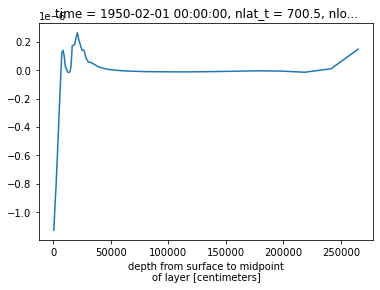

In [14]:
vel_div_NA.isel(time=0, nlon_t=800, nlat_t=700).plot()
print(vel_div_NA.isel(time=0, nlon_t=800, nlat_t=700).values)
print(div_int.isel(time=0, nlon_t=800, nlat_t=700).values)

In [13]:
0.008*1e-2*86400*30

207.36

In [ ]:
z_t_dif = ds0.z_t.diff('z_t').values
print(z_t_dif)
z_t_dif = np.insert(z_t_dif, 0, z_t_dif[0])
DZT = xr.DataArray(data=z_t_dif, coords=[ds0.z_t.values], dims=["z_t"], attrs=dict(longname="T-grid cell thickness",units="cm"))
DZT = DZT.rename('DZT')
DZT